In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from src.signals.daily.dataset_features import create_features_dataframe
from src.signals.daily.train_model import predict_arima_returns, predict_linear_returns, predict_xgbregressor_returns, predict_garch_returns
from src.utils.plots import plot_serie, plot_two_series

### 1. Evaluate models of prediction returns on Single Stock

Benchmark

In [5]:
df = create_features_dataframe('AIR.PA', '2024-05-01', '2024-10-01')

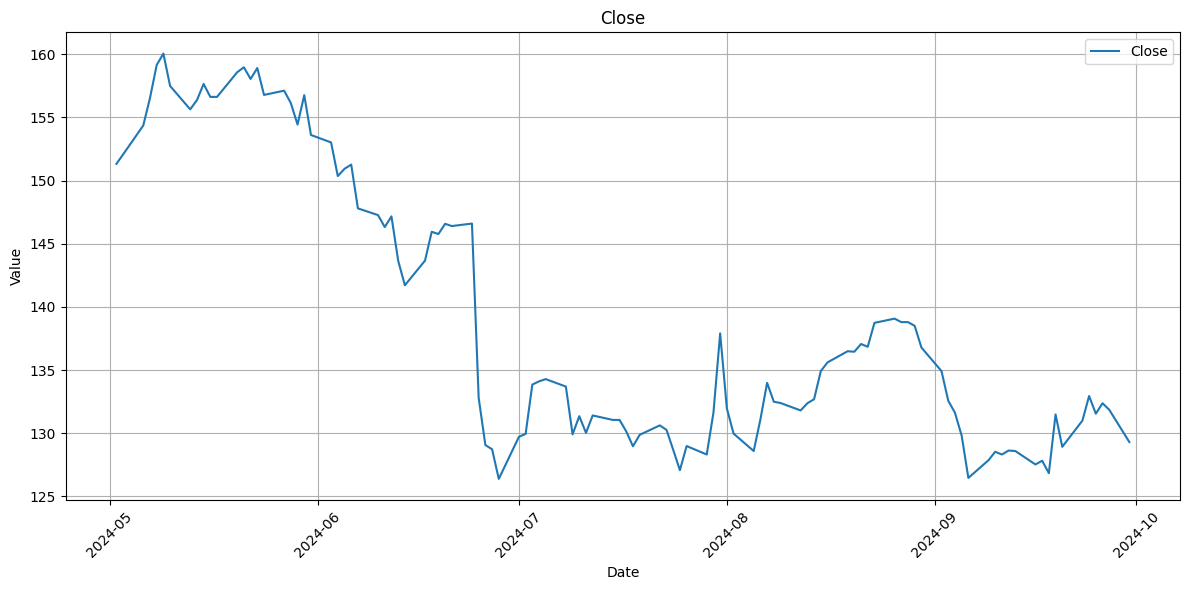

In [8]:
plot_serie(df)

### Prediction of return t+1 with GARCH

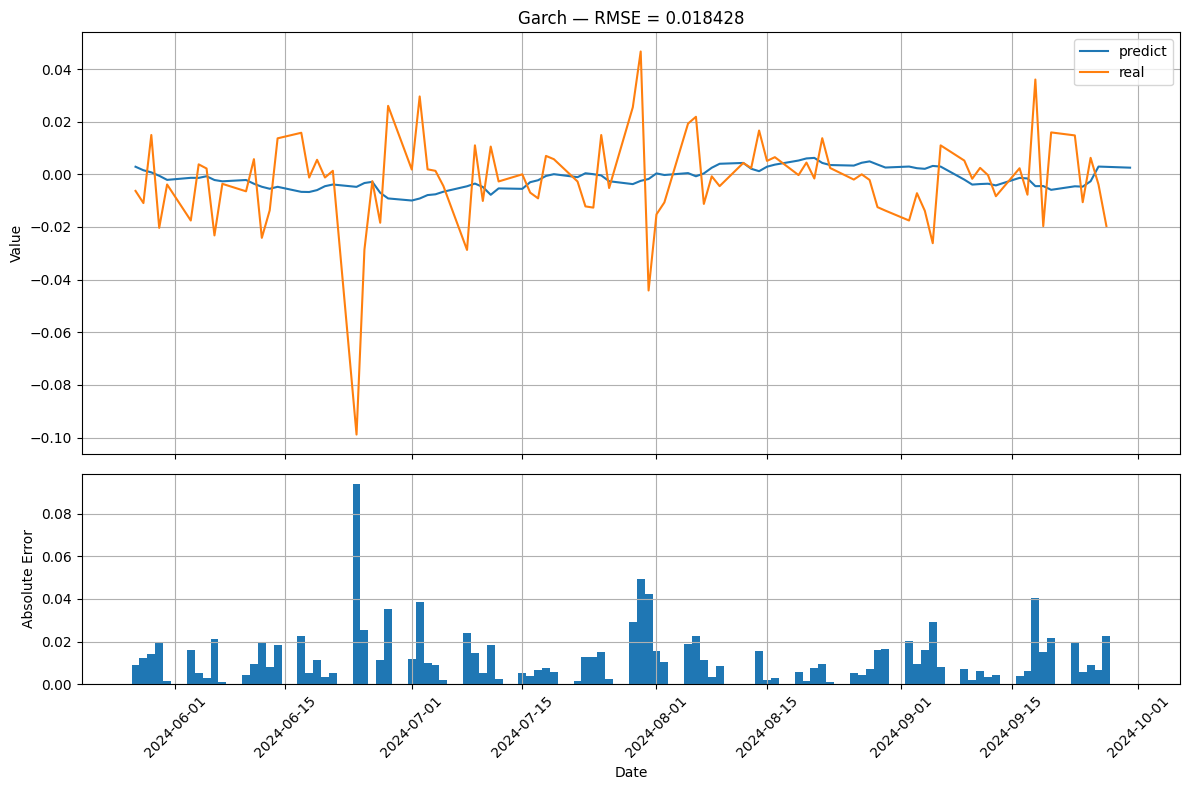

In [4]:
df_garch = predict_garch_returns(df, 15)
plot_two_series(df_garch['predict_return_t'], df_garch['return_t'], "Garch")

### Prediction of return t+1 with Arima

In [ ]:
df_arima = predict_arima_returns(df, 15)

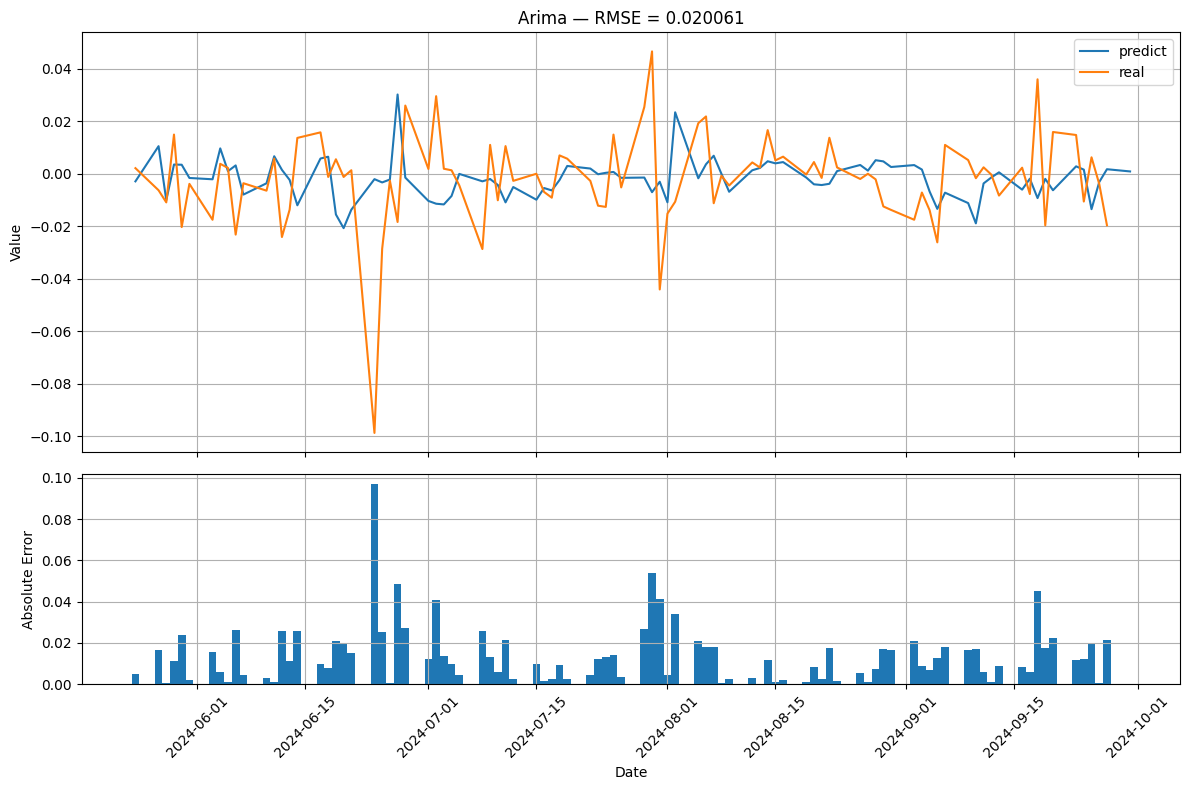

In [6]:
plot_two_series(df_arima['predict_return_t'], df_arima['return_t'], "Arima")

### Prediction of return t+1 with Linear Model

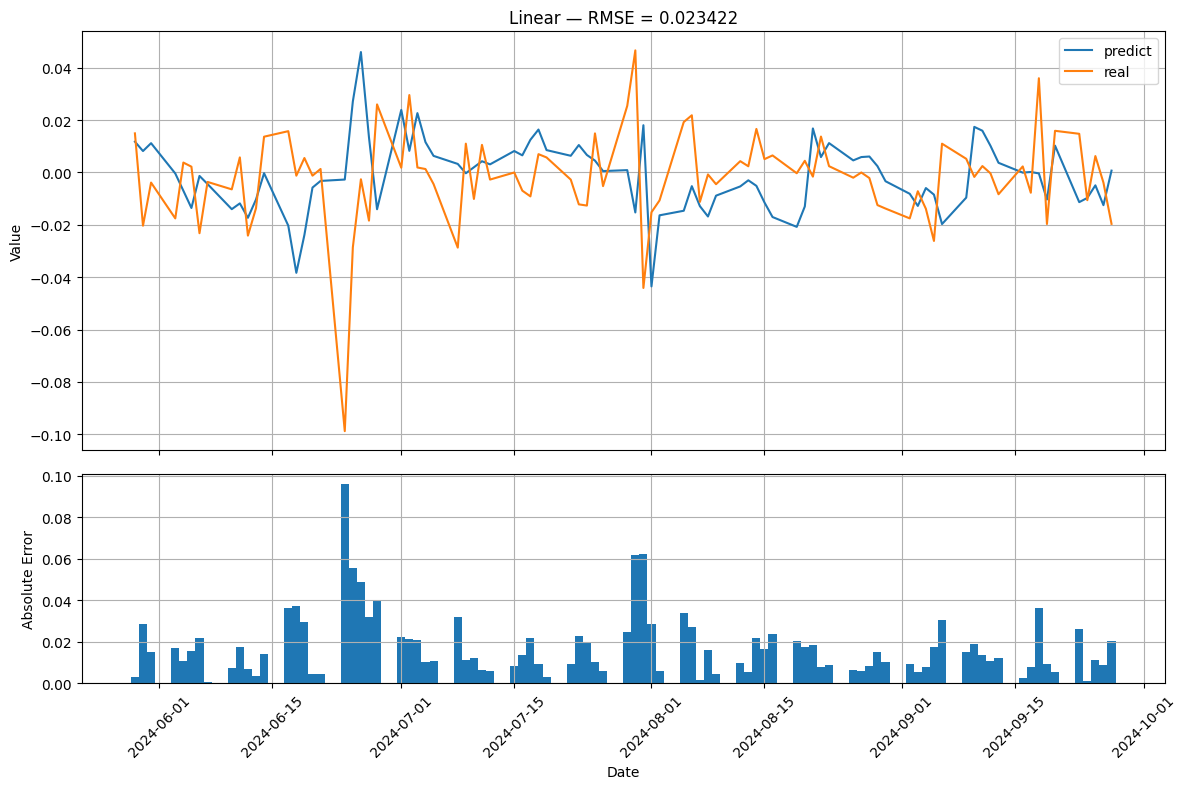

In [7]:
df_linear = predict_linear_returns(df, 15)
plot_two_series(df_linear['predict_return_t'], df_linear['return_t'], "Linear")

### Prediction of return t+1 with Gradient Boosted Tree

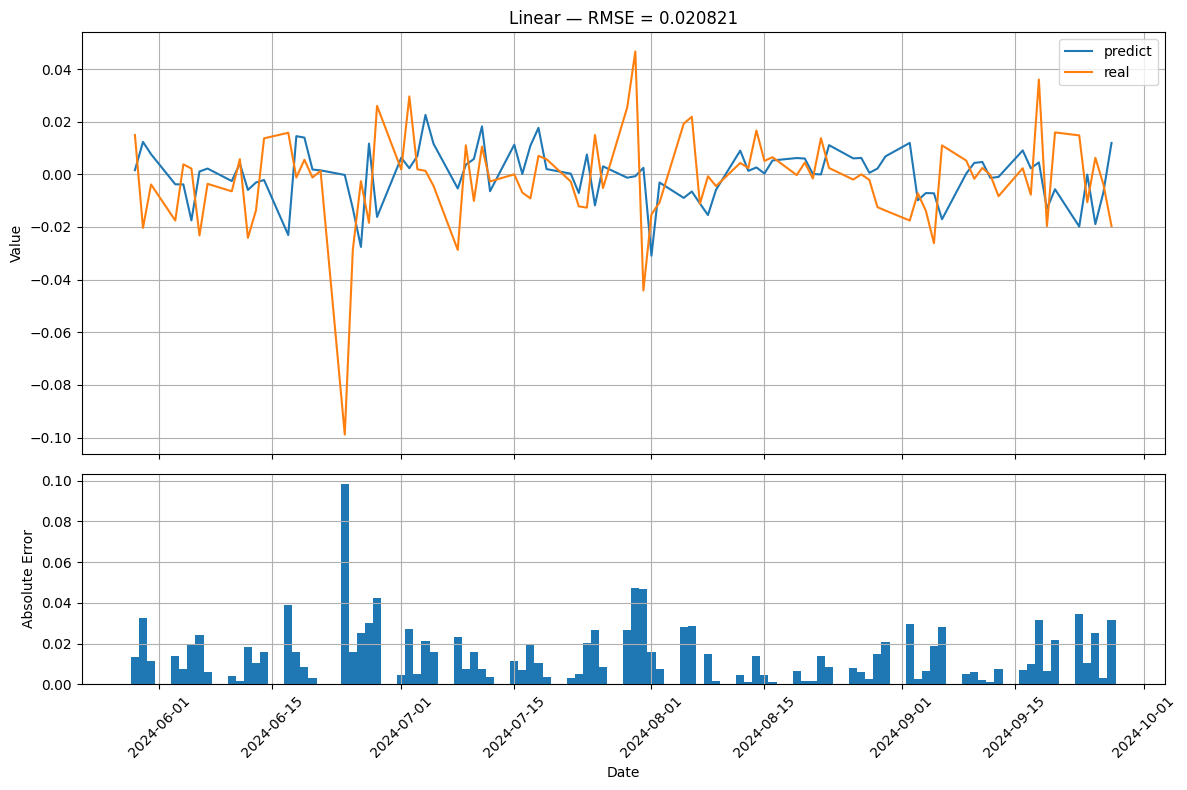

In [8]:
df_xgbr = predict_xgbregressor_returns(df, 15)
plot_two_series(df_xgbr['predict_return_t'], df_xgbr['return_t'], "Linear")